In [1]:
#standard ds imports
import pandas as pd
import numpy as np
#viz and stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# .py imports
from env import user, pwd,host
import env
import wranglerer as wr
import os
#sklearn imports
from sklearn.model_selection import train_test_split
import sklearn.preprocessing

In [2]:
red_df = wr.acquire_red_df()

local version found!


In [3]:
red_df['wine_color'] = 'red'

In [4]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [5]:
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  wine_color            1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [6]:
white_df = wr.acquire_white_df()

local version found!


In [7]:
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
white_df['wine_color'] = 'white'

In [9]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [10]:
red_df.shape

(1599, 13)

In [11]:
white_df.shape

(4898, 13)

In [12]:
df = wr.merge_wines_df(red_df,white_df)

In [13]:
df.shape

(6497, 13)

In [14]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [15]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality', 'wine_color'],
      dtype='object')

In [16]:
wr.summarize(df)

SUMMARY REPORT


Dataframe head: 
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    ph  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality wine_color  
0      9.4        5

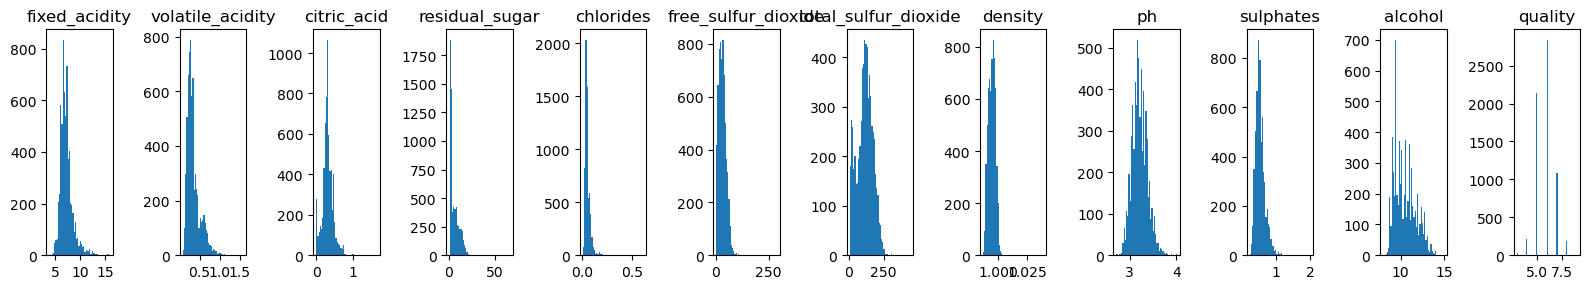

In [17]:
wr.get_hist(df)

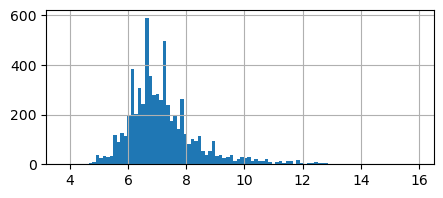

count    6497.000000
mean        7.215307
std         1.296434
min         3.800000
25%         6.400000
50%         7.000000
75%         7.700000
max        15.900000
Name: fixed_acidity, dtype: float64

In [18]:
plt.figure(figsize=(5,2))
df.fixed_acidity.hist(bins=100)
plt.show()
df.fixed_acidity.describe()

In [19]:
wr.get_upper_outliers(df.fixed_acidity).sort_values(ascending=False).head(10)

652     6.25
557     5.95
442     5.95
554     5.85
555     5.85
243     5.35
244     5.35
544     4.65
3125    4.55
374     4.35
Name: fixed_acidity, dtype: float64

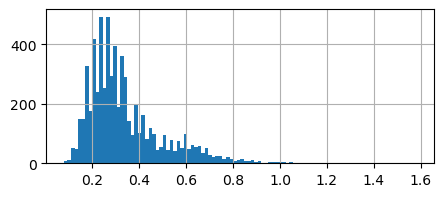

count    6497.000000
mean        0.339666
std         0.164636
min         0.080000
25%         0.230000
50%         0.290000
75%         0.400000
max         1.580000
Name: volatile_acidity, dtype: float64

In [20]:
plt.figure(figsize=(5,2))
df.volatile_acidity.hist(bins=100)
plt.show()
df.volatile_acidity.describe()

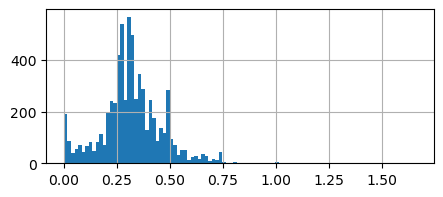

count    6497.000000
mean        0.318633
std         0.145318
min         0.000000
25%         0.250000
50%         0.310000
75%         0.390000
max         1.660000
Name: citric_acid, dtype: float64

In [21]:
plt.figure(figsize=(5,2))
df.citric_acid.hist(bins=100)
plt.show()
df.citric_acid.describe()

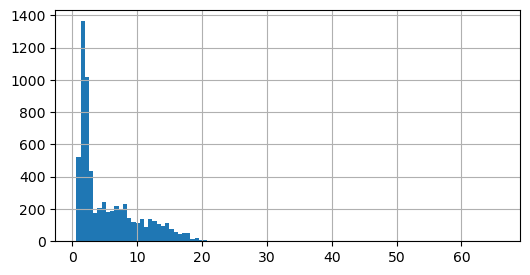

count    6497.000000
mean        5.443235
std         4.757804
min         0.600000
25%         1.800000
50%         3.000000
75%         8.100000
max        65.800000
Name: residual_sugar, dtype: float64

In [22]:
plt.figure(figsize=(6,3))
df.residual_sugar.hist(bins=100)
plt.show()
df.residual_sugar.describe()

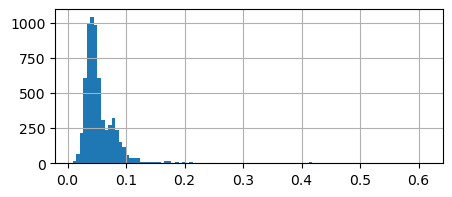

count    6497.000000
mean        0.056034
std         0.035034
min         0.009000
25%         0.038000
50%         0.047000
75%         0.065000
max         0.611000
Name: chlorides, dtype: float64

In [23]:
plt.figure(figsize=(5,2))
df.chlorides.hist(bins=100)
plt.show()
df.chlorides.describe()

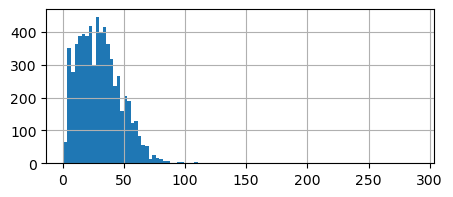

count    6497.000000
mean       30.525319
std        17.749400
min         1.000000
25%        17.000000
50%        29.000000
75%        41.000000
max       289.000000
Name: free_sulfur_dioxide, dtype: float64

In [24]:
plt.figure(figsize=(5,2))
df.free_sulfur_dioxide.hist(bins=100)
plt.show()
df.free_sulfur_dioxide.describe()

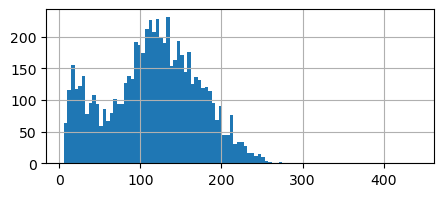

count    6497.000000
mean      115.744574
std        56.521855
min         6.000000
25%        77.000000
50%       118.000000
75%       156.000000
max       440.000000
Name: total_sulfur_dioxide, dtype: float64

In [25]:
plt.figure(figsize=(5,2))
df.total_sulfur_dioxide.hist(bins=100)
plt.show()
df.total_sulfur_dioxide.describe()

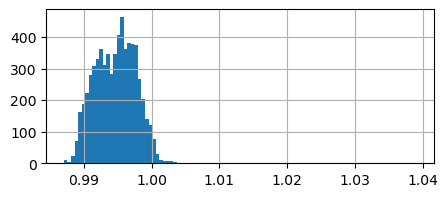

count    6497.000000
mean        0.994697
std         0.002999
min         0.987110
25%         0.992340
50%         0.994890
75%         0.996990
max         1.038980
Name: density, dtype: float64

In [26]:
plt.figure(figsize=(5,2))
df.density.hist(bins=100)
plt.show()
df.density.describe()

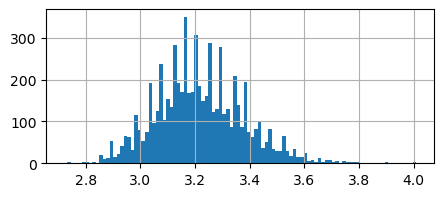

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: ph, dtype: float64

In [27]:
plt.figure(figsize=(5,2))
df.ph.hist(bins=100)
plt.show()
df.ph.describe()

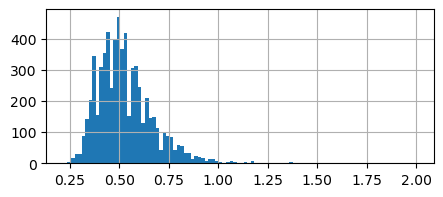

count    6497.000000
mean        0.531268
std         0.148806
min         0.220000
25%         0.430000
50%         0.510000
75%         0.600000
max         2.000000
Name: sulphates, dtype: float64

In [28]:
plt.figure(figsize=(5,2))
df.sulphates.hist(bins=100)
plt.show()
df.sulphates.describe()

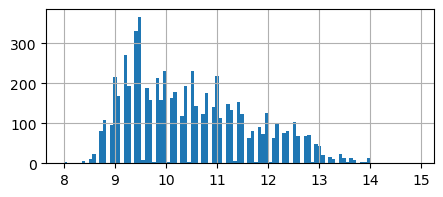

count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

In [29]:
plt.figure(figsize=(5,2))
df.alcohol.hist(bins=100)
plt.show()
df.alcohol.describe()

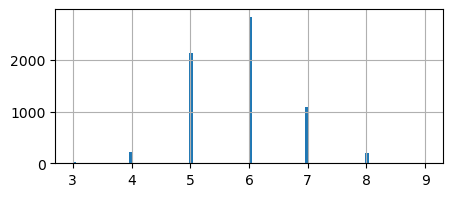

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

In [30]:
plt.figure(figsize=(5,2))
df.quality.hist(bins=100)
plt.show()
df.quality.value_counts().sort_index()

In [31]:
wr.add_upper_outlier_columns(df,1.5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,...,citric_acid_outliers_upper,residual_sugar_outliers_upper,chlorides_outliers_upper,free_sulfur_dioxide_outliers_upper,total_sulfur_dioxide_outliers_upper,density_outliers_upper,ph_outliers_upper,sulphates_outliers_upper,alcohol_outliers_upper,quality_outliers_upper
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
list(df.columns[0:13])

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'ph',
 'sulphates',
 'alcohol',
 'quality',
 'wine_color']

In [33]:
df_outliers = df.drop(columns=['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'ph',
 'sulphates',
 'alcohol',
 'quality',
 'wine_color'])

In [34]:
df_outliers

,fixed_acidity_outliers_upper,volatile_acidity_outliers_upper,citric_acid_outliers_upper,residual_sugar_outliers_upper,chlorides_outliers_upper,free_sulfur_dioxide_outliers_upper,total_sulfur_dioxide_outliers_upper,density_outliers_upper,ph_outliers_upper,sulphates_outliers_upper,alcohol_outliers_upper,quality_outliers_upper
0,0.00,0.045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,0.225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00,0.105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.55,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00,0.045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6493,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6494,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6495,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
outlier_cols = [col for col in df.columns if col.endswith('_outliers_upper')]
df = df.drop(columns=outlier_cols)

In [36]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [37]:
train, validate, test = wr.split_data(df)

In [38]:
train.shape, validate.shape, test.shape

((3637, 13), (910, 13), (1950, 13))

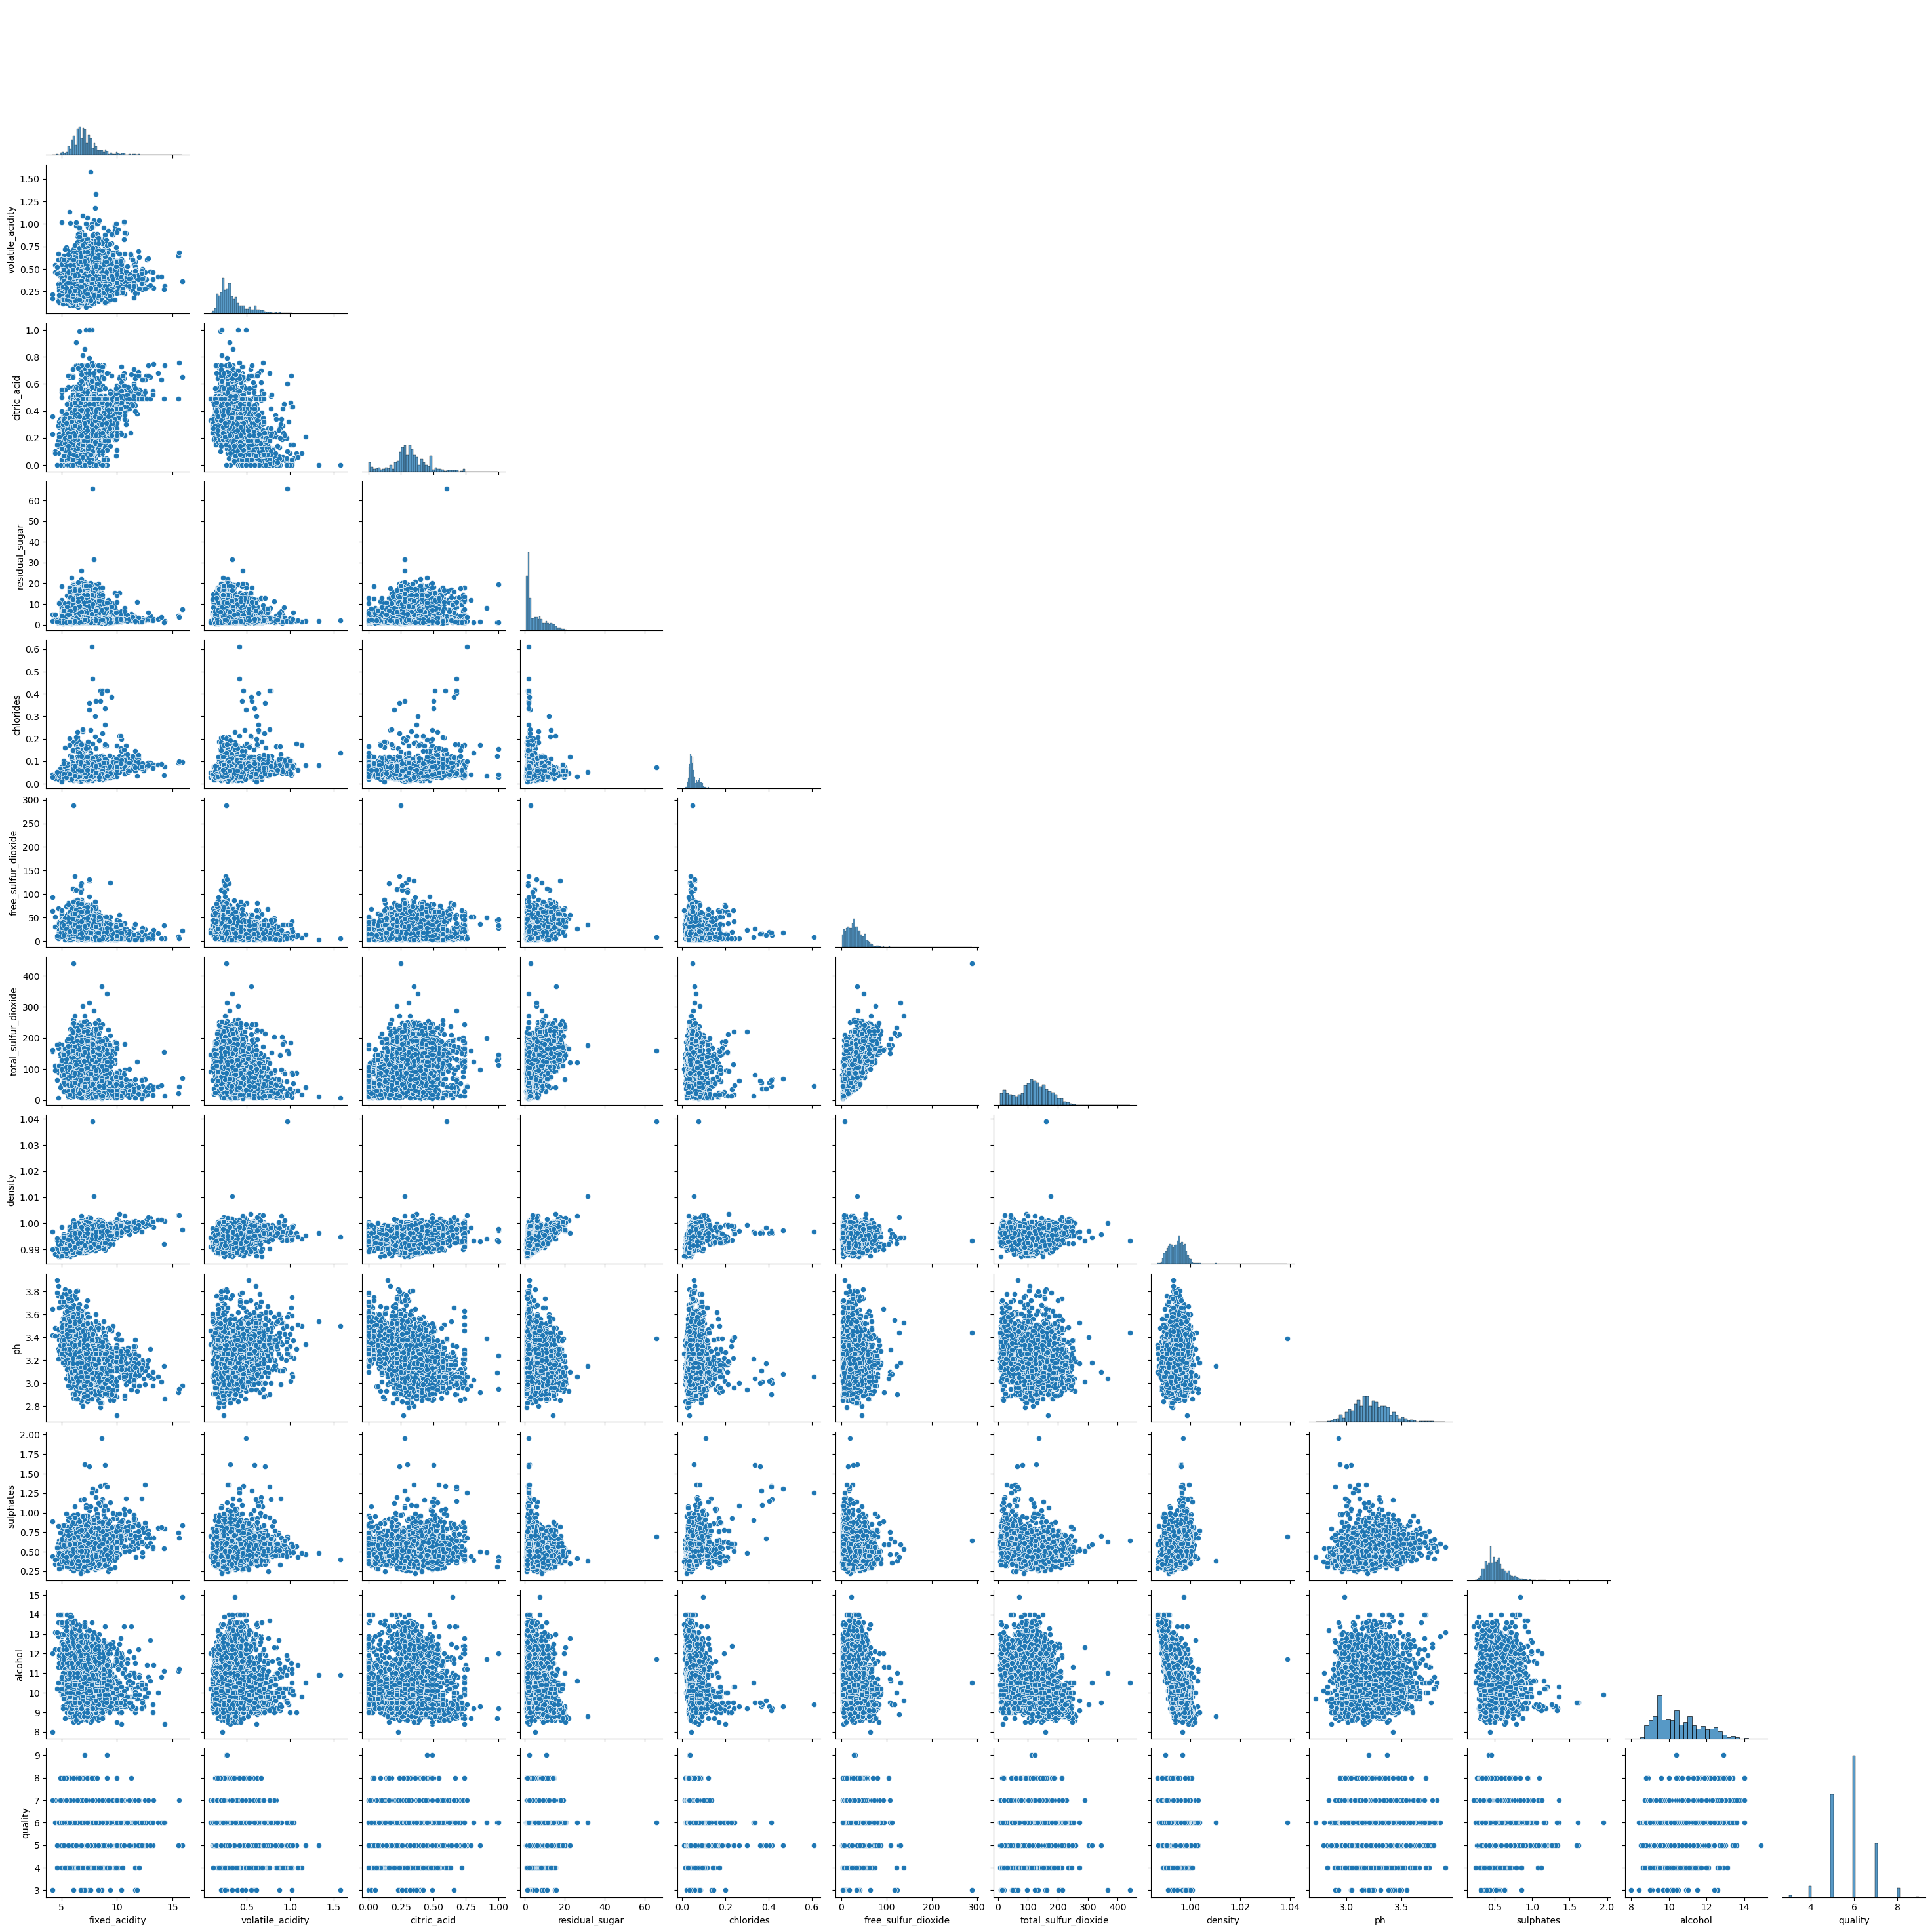

In [39]:
sns.pairplot(train, corner=True)
plt.show()

In [40]:
train[train.quality == 3].mean()

/var/folders/ty/2pnn6wsj06n_glzjgbmxzlkw0000gn/T/ipykernel_2994/858980009.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train[train.quality == 3].mean()


fixed_acidity             8.026316
volatile_acidity          0.481579
citric_acid               0.306842
residual_sugar            5.728947
chlorides                 0.066316
free_sulfur_dioxide      44.263158
total_sulfur_dioxide    125.815789
density                   0.996087
ph                        3.251053
sulphates                 0.517368
alcohol                  10.294737
quality                   3.000000
dtype: float64

In [44]:
df_mean_by_qual = train.groupby(by='quality').mean()

In [46]:
df_mean_by_qual['count'] = df.quality.value_counts().sort_index()

In [47]:
df_mean_by_qual

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,count
quality,,,,,,,,,,,,
3,8.026316,0.481579,0.306842,5.728947,0.066316,44.263158,125.815789,0.996087,3.251053,0.517368,10.294737,30
4,7.233065,0.461169,0.272258,4.009274,0.057669,21.923387,105.729839,0.994857,3.250484,0.514516,10.217339,216
5,7.339804,0.395145,0.307381,5.620307,0.065251,29.999573,119.844283,0.995798,3.210964,0.526596,9.847099,2138
6,7.181595,0.314547,0.323048,5.494631,0.054258,31.075419,115.165115,0.994546,3.216549,0.532601,10.578471,2836
7,7.104934,0.289523,0.332961,4.718586,0.045480,30.115954,106.876645,0.993136,3.232418,0.546053,11.380033,1079
8,6.737624,0.290990,0.326634,5.385644,0.040990,35.831683,122.123762,0.992393,3.222970,0.511881,11.687129,193
9,8.100000,0.265000,0.470000,6.400000,0.033500,29.500000,118.500000,0.993650,3.285000,0.440000,11.650000,5


In [ ]:
# total = 0
# for col in df_outliers:
#     print(col, ': ')
#     subset = df_outliers[col][df[col] > 0]
#     print(f'Number of Observations Above Upper Bound: {subset.count()}', '\n')
#     total += subset.count()
#     print(subset.describe())
#     print('------',{total}, '\n')